In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import os
import cv2
from matplotlib import pyplot as plt

In [2]:
# #Detection Result Json
base_dir = '/opt/ml/detection/dataset/'
json_dir = 'mosaic_train.json'

data_json = base_dir+json_dir

In [3]:
#json 불러오기 + Dataframe형태로 변경
with open (data_json, 'r') as outfile:
    data = json.load(outfile)

df_images = pd.DataFrame(data['images'])
df_annotations = pd.DataFrame(data['annotations'])
df_categories = pd.DataFrame(data['categories'])

In [4]:
def show_img(idx):
    
    file_name = df_images.loc[idx, 'file_name']
    image_id = df_images.loc[idx, 'id']
    
    img = cv2.imread(base_dir+file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    df_extract = df_annotations.loc[df_annotations['image_id']==image_id]
    
    bboxes = df_extract['bbox']
    
    for bbox in bboxes:
        
        x, y, w, h = bbox
        xmax = x+w
        ymax = y+h
        
        print(x, y, xmax, ymax)
        img = cv2.rectangle(img, (int(x),int(y)), (int(xmax),int(ymax)), (0,0,255), 10)
        print('create rectangle!')
    return img

In [5]:
df_annotations.loc[df_annotations['image_id']==0]

,image_id,category_id,area,bbox,iscrowd,id,location
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,lt
1,0,0,128771.94,"[1247.2, 418.8, 430.1, 299.4]",0,13341,rt
2,0,0,283267.14,"[636.6, 1062.9, 308.1, 919.4]",0,1827,lb
3,0,0,339985.14,"[416.5, 1098.9, 389.4, 873.1]",0,1828,lb
4,0,7,337879.20,"[0.0, 1414.6, 552.0, 612.1]",0,1829,lb
5,0,1,79295.92,"[1262.2, 1077.8, 394.9, 200.8]",0,17747,rb
6,0,1,257047.31,"[1203.8, 1248.8, 661.3, 388.7]",0,17748,rb
7,0,1,278597.62,"[1153.0, 1257.3, 558.2, 499.1]",0,17749,rb
8,0,0,35952.28,"[1643.9, 1435.4, 107.9, 333.2]",0,17750,rb


197.6 193.7 745.4 663.4
create rectangle!
1247.2 418.8 1677.3000000000002 718.2
create rectangle!
636.6 1062.9 944.7 1982.3000000000002
create rectangle!
416.5 1098.9 805.9 1972.0
create rectangle!
0.0 1414.6 552.0 2026.6999999999998
create rectangle!
1262.2 1077.8 1657.1 1278.6
create rectangle!
1203.8 1248.8 1865.1 1637.5
create rectangle!
1153.0 1257.3 1711.2 1756.4
create rectangle!
1643.9 1435.4 1751.8000000000002 1768.6000000000001
create rectangle!


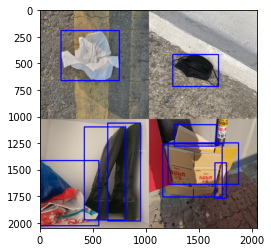

In [6]:
plt.imshow(show_img(0))